## Recommendation system with Universal Sentence encoder


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np

# Load the MovieLens 100k dataset
ratings = tfds.load('movielens/100k-ratings', split="train")
movies = tfds.load('movielens/100k-movies', split="train")

# Extract movie titles and user ids
ratings = ratings.map(lambda x: {"movie_title": x["movie_title"], "user_id": x["user_id"]})
movies = movies.map(lambda x: x["movie_title"])

# Use Universal Sentence Encoder to generate movie embeddings
embedding_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedding_layer = hub.KerasLayer(embedding_url, input_shape=[], dtype=tf.string, trainable=False)

# Generate movie embeddings
movie_titles = list(movies.as_numpy_iterator())
movie_embeddings = embedding_layer(movie_titles)

# Create a movie id to embedding mapping
movie_embeddings_dict = {title: embedding for title, embedding in zip(movie_titles, movie_embeddings)}

# Create user embeddings by averaging the embeddings of the movies they have rated
def get_user_embedding(user_id):
    def filter_by_user_id(x, user_id):
        return x["user_id"] == user_id

    def extract_movie_title(x):
        return x["movie_title"]

    user_movies = ratings.filter(lambda x: filter_by_user_id(x, user_id)).map(extract_movie_title)
    user_movie_embeddings = [movie_embeddings_dict[movie] for movie in user_movies.as_numpy_iterator()]
    return tf.reduce_mean(user_movie_embeddings, axis=0)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.BRV9T5_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/incomplete.U1FUQK_0.1.1/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


## Recommending movies using the model


In [5]:
def recommend_movies(user_id, k=10):
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title.decode('utf-8')] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage:
user_id = b"486"
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id.decode('utf-8')}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 486:
Brassed Off (1996)
Kolya (1996)
Diabolique (1996)
Frighteners, The (1996)
Bio-Dome (1996)
Stupids, The (1996)
Palookaville (1996)
Schizopolis (1996)
Sunchaser, The (1996)
Foxfire (1996)


In [6]:
def recommend_movies(user_id, k=10):
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title.decode('utf-8')] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage:
user_id = b"76"
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id.decode('utf-8')}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 76:
Virtuosity (1995)
Coneheads (1993)
Bio-Dome (1996)
Frighteners, The (1996)
Body Snatchers (1993)
Diabolique (1996)
Desperado (1995)
Fugitive, The (1993)
Exotica (1994)
Brassed Off (1996)


In [7]:
def recommend_movies(user_id, k=10):
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title.decode('utf-8')] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage:
user_id = b"124"
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id.decode('utf-8')}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 124:
Die Hard (1988)
Empire Strikes Back, The (1980)
Virtuosity (1995)
Full Metal Jacket (1987)
Braveheart (1995)
Desperado (1995)
Die Hard 2 (1990)
Princess Bride, The (1987)
Toy Story (1995)
Mallrats (1995)


### The script creates a movie recommendation system using the MovieLens 100k dataset. It loads the dataset and extracts movie titles and user IDs. To generate movie embeddings, it leverages the Universal Sentence Encoder from TensorFlow Hub, mapping movie titles to their corresponding embeddings. These embeddings are stored in a dictionary for easy access. User embeddings are generated by averaging the embeddings of the movies each user has rated. This process involves filtering the ratings dataset by user ID and mapping the titles to their embeddings, then calculating the mean embedding for each user. This setup prepares the data for a recommendation system that can suggest movies based on these user and movie embeddings.

## Recommendation  system using BERT


In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Load the MovieLens 100k dataset
ratings = tfds.load('movielens/100k-ratings', split="train")
movies = tfds.load('movielens/100k-movies', split="train")

# Extract movie titles and user ids
ratings = ratings.map(lambda x: {"movie_title": x["movie_title"], "user_id": x["user_id"]})
movies = movies.map(lambda x: x["movie_title"])


In [9]:
# Use BERT to generate movie embeddings
bert_model_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
bert_layer = hub.KerasLayer(bert_model_url, input_shape=[], dtype=tf.string, trainable=False)

# Generate movie embeddings
movie_titles = [title.decode('utf-8') for title in movies.as_numpy_iterator()]
movie_embeddings = bert_layer(movie_titles)

# Create a movie title to embedding mapping
movie_embeddings_dict = {title: embedding for title, embedding in zip(movie_titles, movie_embeddings)}


In [10]:
# Create user embeddings by averaging the embeddings of the movies they have rated
def get_user_embedding(user_id):
    def filter_by_user_id(x):
        return x["user_id"] == user_id

    def extract_movie_title(x):
        return x["movie_title"]

    user_movies = ratings.filter(filter_by_user_id).map(extract_movie_title)
    user_movie_embeddings = [movie_embeddings_dict[movie.decode('utf-8')] for movie in user_movies.as_numpy_iterator()]
    return tf.reduce_mean(user_movie_embeddings, axis=0)


## Recommending movies using the model


In [11]:
def recommend_movies(user_id, k=10):
    user_id = str(user_id)  # Ensure the user_id is a string
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage
user_id = 486  # Example user ID
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 486:
Schizopolis (1996)
Kolya (1996)
Brassed Off (1996)
Fear (1996)
Dear God (1996)
Fan, The (1996)
Escape from L.A. (1996)
Beautiful Thing (1996)
Sunchaser, The (1996)
Gabbeh (1996)


In [35]:
def recommend_movies(user_id, k=10):
    user_id = str(user_id)  # Ensure the user_id is a string
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage
user_id = 49  # Example user ID
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 49:
Fear (1996)
Schizopolis (1996)
Fear, The (1995)
Kolya (1996)
Screamers (1995)
Diabolique (1996)
Dead Man (1995)
Dadetown (1995)
Scream (1996)
Virtuosity (1995)


In [13]:
def recommend_movies(user_id, k=10):
    user_id = str(user_id)  # Ensure the user_id is a string
    user_embedding = get_user_embedding(user_id)
    movie_scores = {}

    for title, embedding in movie_embeddings_dict.items():
        score = tf.reduce_sum(user_embedding * embedding).numpy()
        movie_scores[title] = score

    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)[:k]


    return [movie for movie, score in recommended_movies]

# Example usage
user_id = 99  # Example user ID
recommended_movies = recommend_movies(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie)


Top 10 movie recommendations for user 99:
Fear (1996)
Schizopolis (1996)
Kolya (1996)
Fear, The (1995)
Diabolique (1996)
Brassed Off (1996)
Scream (1996)
Stupids, The (1996)
Kissed (1996)
Bushwhacked (1995)


### The script sets up a movie recommendation system using the MovieLens 100k dataset and the BERT-based Universal Sentence Encoder from TensorFlow Hub to generate embeddings for movie titles. It first loads the dataset and extracts movie titles and user IDs. The script then maps movie titles to their BERT embeddings and stores these in a dictionary. For user embeddings, it averages the embeddings of the movies each user has rated. This is achieved by filtering the ratings dataset for each user's rated movies, mapping these titles to their embeddings, and computing the mean embedding for each user. This setup prepares user and movie embeddings for generating personalized movie recommendations.

## Recommendation system using tensorflow recommenders

In [27]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs
from typing import Dict, Text

# Load the MovieLens 100k dataset.
ratings = tfds.load('movielens/100k-ratings', split="train")
movies = tfds.load('movielens/100k-movies', split="train")

# Select the basic features.
ratings = ratings.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
})

movies = movies.map(lambda x: x["movie_title"])

# Create user and movie vocabulary.
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))

movie_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
movie_titles_vocabulary.adapt(movies)

class MovieLensModel(tfrs.Model):
    def __init__(self):
        super().__init__()

        embedding_dim = 256  # Increased embedding dimension

        # Set up user and movie representations.
        self.user_model = tf.keras.Sequential([
            user_ids_vocabulary,
            tf.keras.layers.Embedding(user_ids_vocabulary.vocabulary_size(), embedding_dim),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),  # Dropout layer
            tf.keras.layers.Dense(embedding_dim)
        ])
        self.movie_model = tf.keras.Sequential([
            movie_titles_vocabulary,
            tf.keras.layers.Embedding(movie_titles_vocabulary.vocabulary_size(), embedding_dim),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),  # Dropout layer
            tf.keras.layers.Dense(embedding_dim)
        ])

        # Set up a retrieval task.
        self.task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=movies.batch(128).map(self.movie_model)
            )
        )

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features["user_id"])
        # And pick out the movie features and pass them into the movie model,
        # getting embeddings back.
        positive_movie_embeddings = self.movie_model(features["movie_title"])

        # The task computes the loss and the metrics.
        return self.task(user_embeddings, positive_movie_embeddings)


# Learning rate scheduler
# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

# Instantiate the model with Adam optimizer and a learning rate scheduler.
model = MovieLensModel()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule))

# Prepare the training data.
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

# Split between train and test.
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

# Cache the data for better performance.
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

# Train the model for 20 epochs.
history=model.fit(cached_train, epochs=20)


# Evaluate the model.
evaluation = model.evaluate(cached_test, return_dict=True)
print(evaluation)

Epoch 1/20
10/10 [==============================] - 64s 6s/step - factorized_top_k/top_1_categorical_accuracy: 2.6250e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0024 - factorized_top_k/top_10_categorical_accuracy: 0.0051 - factorized_top_k/top_50_categorical_accuracy: 0.0271 - factorized_top_k/top_100_categorical_accuracy: 0.0549 - loss: 70367.9382 - regularization_loss: 0.0000e+00 - total_loss: 70367.9382
Epoch 2/20
10/10 [==============================] - 59s 6s/step - factorized_top_k/top_1_categorical_accuracy: 8.7500e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0058 - factorized_top_k/top_10_categorical_accuracy: 0.0117 - factorized_top_k/top_50_categorical_accuracy: 0.0514 - factorized_top_k/top_100_categorical_accuracy: 0.0953 - loss: 70357.7180 - regularization_loss: 0.0000e+00 - total_loss: 70357.7180
Epoch 3/20
10/10 [==============================] - 56s 6s/step - factorized_top_k/top_1_categorical_accuracy: 0.0021 - factorized_top_k/top_5_categorical_accur

## Recommending movies using the model

In [23]:
# Function to get movie recommendations
def get_movie_recommendations(user_id: str, k: int = 10):
    # Create a dataset with the user_id repeated k times
    user_id_tensor = tf.constant([user_id])
    user_dataset = tf.data.Dataset.from_tensor_slices(user_id_tensor).repeat(k)

    # Prepare the candidate embeddings dataset
    candidate_embeddings = movies.batch(128).map(model.movie_model)
    candidate_dataset = tf.data.Dataset.zip((movies.batch(128), candidate_embeddings))

    # Use the BruteForce layer for recommendations
    top_k = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    top_k.index_from_dataset(candidate_dataset)

    _, titles = top_k(user_id_tensor, k=k)
    return titles[0].numpy()

# Example usage
user_id = "42"  # Replace with a valid user_id from your dataset
recommended_movies = get_movie_recommendations(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie.decode('utf-8'))  # Assuming the movie titles are byte strings


Top 10 movie recommendations for user 42:
It Takes Two (1995)
Kid in King Arthur's Court, A (1995)
D3: The Mighty Ducks (1996)
Rent-a-Kid (1995)
Zeus and Roxanne (1997)
Far From Home: The Adventures of Yellow Dog (1995)
Free Willy 2: The Adventure Home (1995)
Calendar Girl (1993)
Little Big League (1994)
Temptress Moon (Feng Yue) (1996)


In [20]:
# Function to get movie recommendations
def get_movie_recommendations(user_id: str, k: int = 10):
    # Create a dataset with the user_id repeated k times
    user_id_tensor = tf.constant([user_id])
    user_dataset = tf.data.Dataset.from_tensor_slices(user_id_tensor).repeat(k)

    # Prepare the candidate embeddings dataset
    candidate_embeddings = movies.batch(128).map(model.movie_model)
    candidate_dataset = tf.data.Dataset.zip((movies.batch(128), candidate_embeddings))

    # Use the BruteForce layer for recommendations
    top_k = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    top_k.index_from_dataset(candidate_dataset)

    _, titles = top_k(user_id_tensor, k=k)
    return titles[0].numpy()

# Example usage
user_id = "4"  # Replace with a valid user_id from your dataset
recommended_movies = get_movie_recommendations(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie.decode('utf-8'))  # Assuming the movie titles are byte strings


Top 10 movie recommendations for user 4:
City of Industry (1997)
Kicked in the Head (1997)
Incognito (1997)
Bean (1997)
Fallen (1998)
FairyTale: A True Story (1997)
Alien: Resurrection (1997)
Spawn (1997)
Smile Like Yours, A (1997)
Hugo Pool (1997)


In [21]:
# Function to get movie recommendations
def get_movie_recommendations(user_id: str, k: int = 10):
    # Create a dataset with the user_id repeated k times
    user_id_tensor = tf.constant([user_id])
    user_dataset = tf.data.Dataset.from_tensor_slices(user_id_tensor).repeat(k)

    # Prepare the candidate embeddings dataset
    candidate_embeddings = movies.batch(128).map(model.movie_model)
    candidate_dataset = tf.data.Dataset.zip((movies.batch(128), candidate_embeddings))

    # Use the BruteForce layer for recommendations
    top_k = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    top_k.index_from_dataset(candidate_dataset)

    _, titles = top_k(user_id_tensor, k=k)
    return titles[0].numpy()

# Example usage
user_id = "899"  # Replace with a valid user_id from your dataset
recommended_movies = get_movie_recommendations(user_id, k=10)
print(f"Top 10 movie recommendations for user {user_id}:")
for movie in recommended_movies:
    print(movie.decode('utf-8'))  # Assuming the movie titles are byte strings


Top 10 movie recommendations for user 899:
Aladdin (1992)
Hunt for Red October, The (1990)
Star Trek: The Wrath of Khan (1982)
Terminator 2: Judgment Day (1991)
Back to the Future (1985)
Blues Brothers, The (1980)
Princess Bride, The (1987)
Groundhog Day (1993)
Monty Python and the Holy Grail (1974)
Apollo 13 (1995)


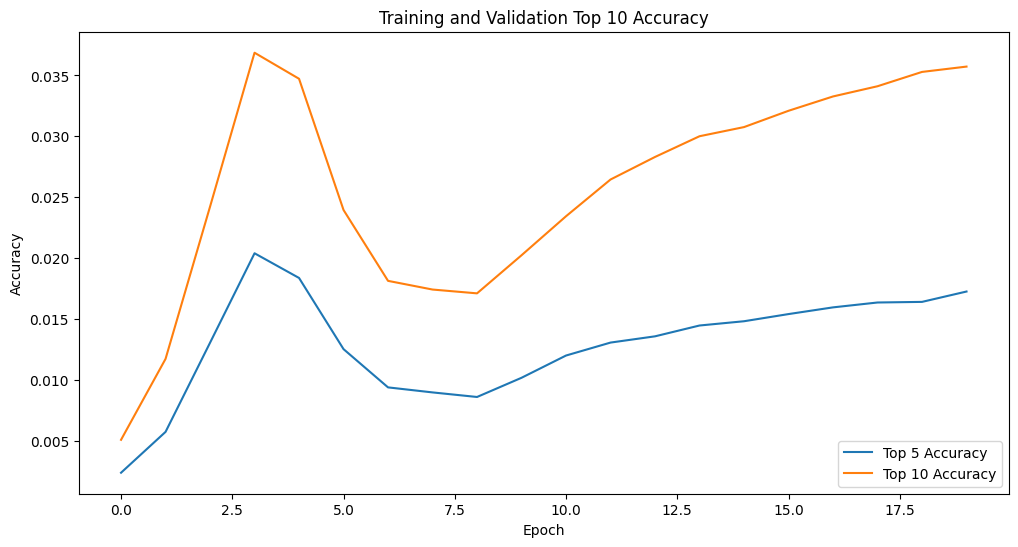

In [34]:
import matplotlib.pyplot as plt
# Plot the FactorizedTopK metric (retrieval metric)
plt.figure(figsize=(12, 6))

plt.plot(history.history['factorized_top_k/top_5_categorical_accuracy'], label='Top 5 Accuracy')
plt.plot(history.history['factorized_top_k/top_10_categorical_accuracy'], label='Top 10 Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Top 10 Accuracy')

plt.show()

### This script builds and trains a movie recommendation system using the MovieLens 100k dataset. It first loads and processes the dataset to extract user IDs and movie titles, creating vocabulary layers for both. The model architecture includes embedding layers for users and movies, with dense and dropout layers to enhance learning. A retrieval task is set up using TensorFlow Recommenders. The model uses an exponential decay learning rate schedule and is trained for 20 epochs. The data is shuffled, split into training and testing sets, and cached for performance. Finally, the model is evaluated on the test set to determine its effectiveness.